In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
### in this dataset we need to find selling price of the car

In [40]:
data.shape

(301, 9)

In [41]:
uniq_col = ['Fuel_Type','Seller_Type','Transmission','Owner']

In [42]:
for col in uniq_col:
    print(col," : ",data[col].unique())

Fuel_Type  :  ['Petrol' 'Diesel' 'CNG']
Seller_Type  :  ['Dealer' 'Individual']
Transmission  :  ['Manual' 'Automatic']
Owner  :  [0 1 3]


In [43]:
# checking null values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [44]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [45]:
# using year column it is quite diffcult to determine how old car is
# best way we can calculate no. or year of (how old car is)
# by substracting current year to given car year

In [46]:
new_data = data.copy()

In [47]:
new_data['Cueernt_year'] = 2020

In [49]:
new_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Cueernt_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [50]:
new_data["No_Of_Year"] = new_data['Cueernt_year'] - new_data['Year']

In [51]:
new_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Cueernt_year,No_Of_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [52]:
# not their are some columns in dataset that not requied or model
drop_col = ['Car_Name','Year','Cueernt_year']

In [53]:

new_data.drop(columns=drop_col, axis=1, inplace=True)

In [54]:
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [55]:
# create dummies
new_data = pd.get_dummies(new_data, drop_first = True)

In [56]:
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [57]:
new_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


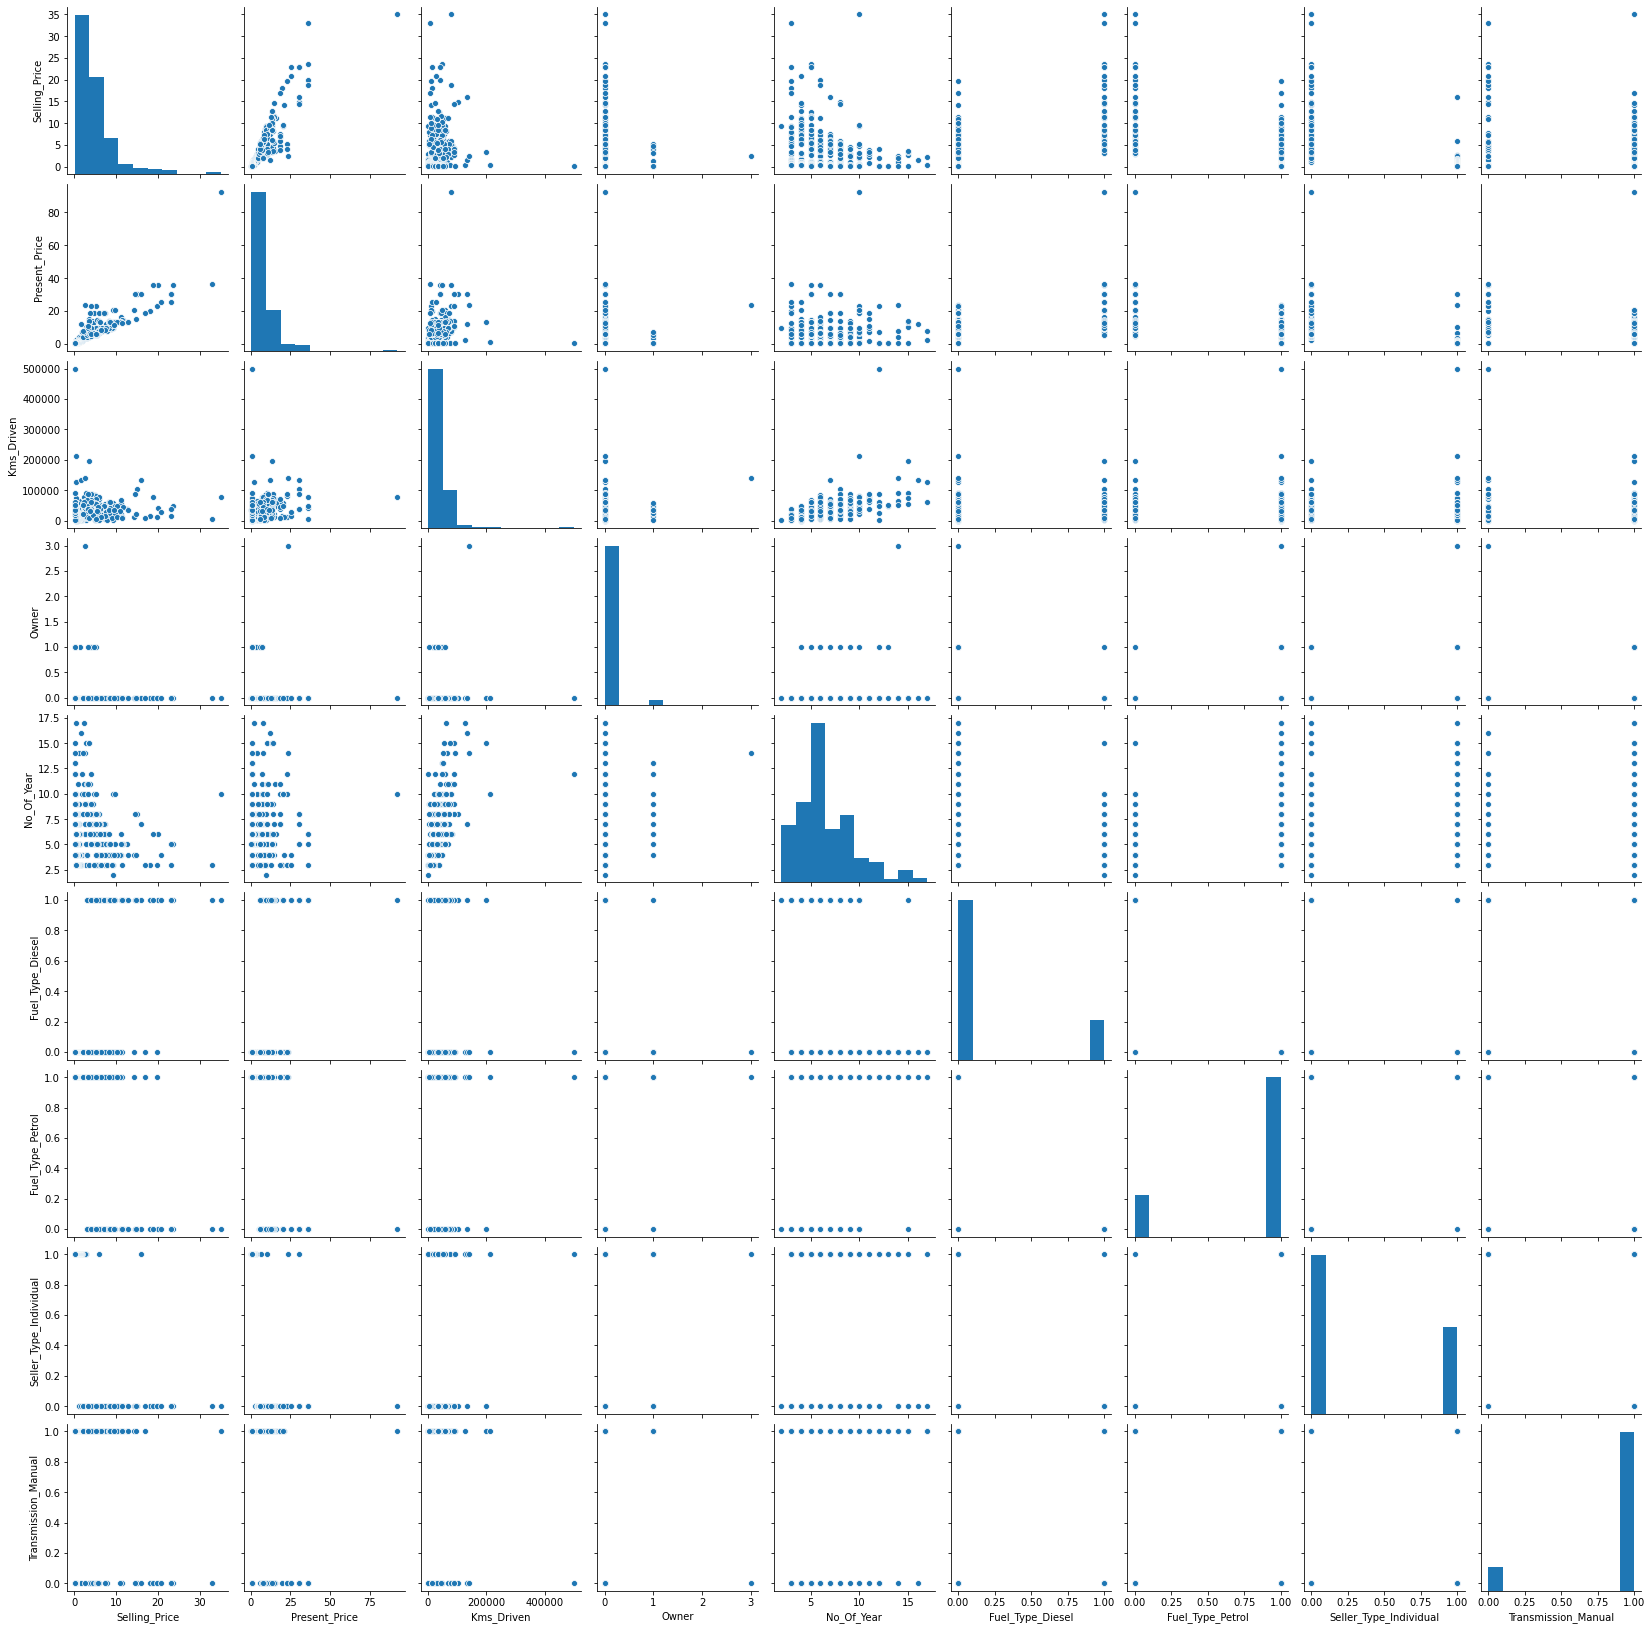

In [58]:
sns.pairplot(new_data)
plt.show()

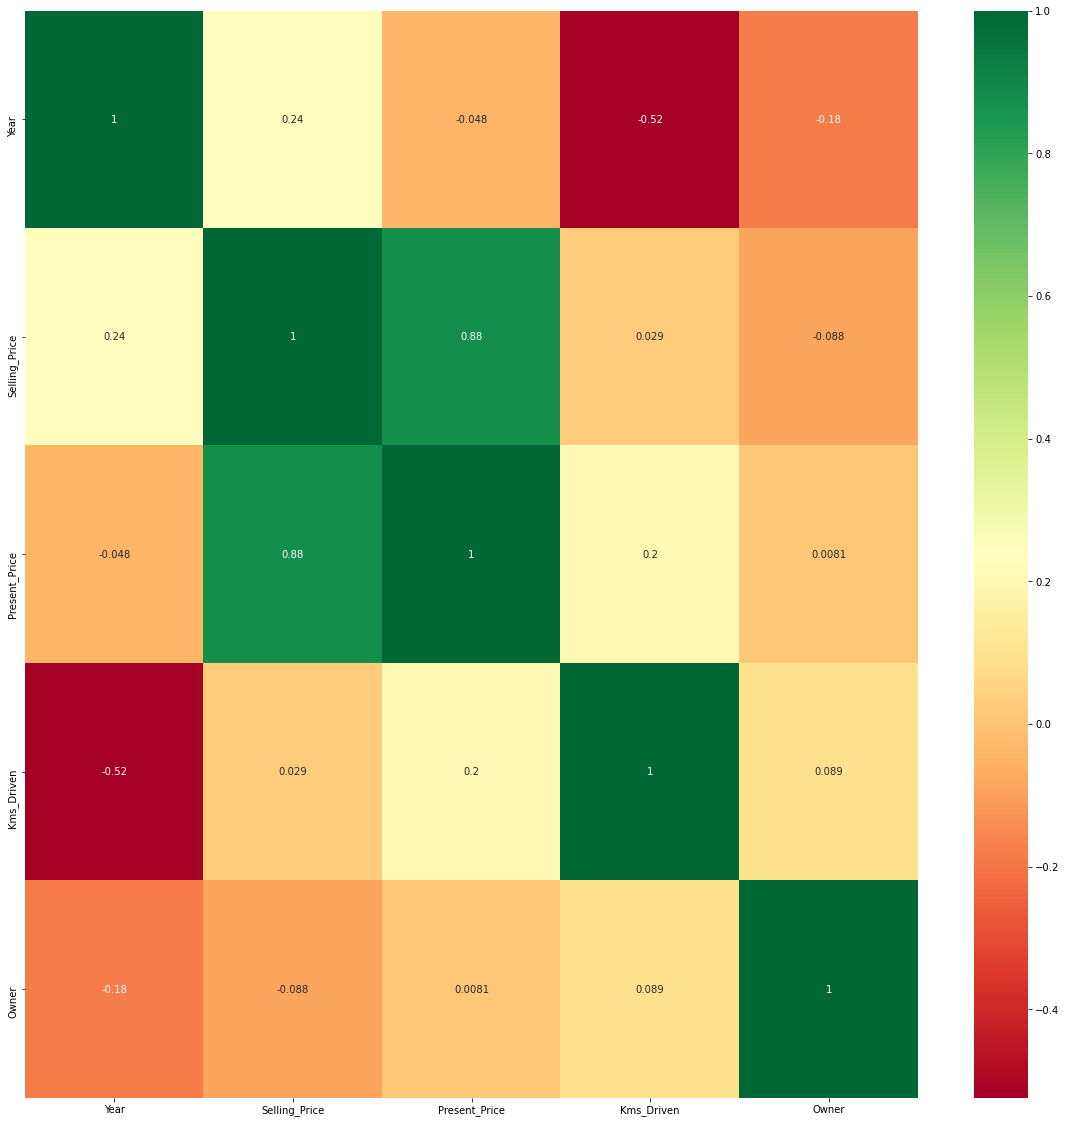

In [59]:
plt.figure(figsize=(20,20))
corrmat = data.corr()
top_corr = corrmat.index
sns.heatmap(data[top_corr].corr(),annot=True, cmap='RdYlGn')
plt.show()

In [60]:
X = new_data.drop(columns=['Selling_Price'])  # independent variable
y = new_data['Selling_Price']                 # dependent variable

In [62]:
## Feature Importance
## ExtraTreeRegression use for checking which Feature have Major role in building the model

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

In [64]:
fea_imp = ExtraTreesRegressor()
fea_imp.fit(X,y)

ExtraTreesRegressor()

In [79]:
imp = fea_imp.feature_importances_

In [96]:
impo_fea_data = pd.DataFrame(columns=['Column_Name'])

In [97]:
impo_fea_data['Column_Name'] = list(X.columns)
impo_fea_data['Impotances'] = list(imp)

In [98]:
impo_fea_data   # it will shows which feature more importance

,Column_Name,Impotances
0,Present_Price,0.361150
1,Kms_Driven,0.042531
2,Owner,0.000367
3,No_Of_Year,0.074267
4,Fuel_Type_Diesel,0.227624
5,Fuel_Type_Petrol,0.016523
6,Seller_Type_Individual,0.131264
7,Transmission_Manual,0.146273


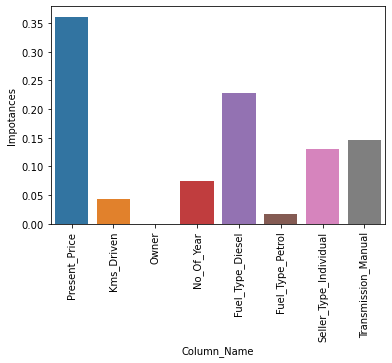

In [102]:
plt.xticks(rotation = 90)
sns.barplot(x = impo_fea_data['Column_Name'], y=impo_fea_data['Impotances'])
plt.show()

In [103]:
# split dataset
from sklearn.model_selection import train_test_split

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [106]:
x_train.shape, x_test.shape

((210, 8), (91, 8))

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
reg = RandomForestRegressor()

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
# Random forest have many parameters 
# Random search is a technique where random combinations of the 
# hyperparameters are used to find the best solution for the 
# built model.

In [111]:
# we will take some somple values for parameters and check which will be the best solution

In [112]:
# no. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# no. of features to consider at every split
max_features = ['auto','sqrt']

# max no. of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# max no. of samples required to split a node
min_sample_split = [2,5,10,15,100]

# min no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [113]:
# random search have param_distribution parameter which wants 
# a dictnary of parameters (key values pairs)
# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_samples_leaf
              }

In [115]:
# random search of parameters, using 3 fold cross validation
# search cross 100 differnet combinations

rf = RandomizedSearchCV(estimator=reg, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv = 5, verbose=2,random_state=42, n_jobs=1)

In [116]:
# estimator = which model estimator which we use
# param_distribution = dictionary of parameters in estimators
# scoring = here we use regression so we need mean square error
# n_iter = no. of iterations of models
# cv = Cross validation (here K fold CV uses)
# verbose = when we fit RandomSearch it will shows the procedure by printing, when we use verbose
# n_jobs = how many core do we need to use from CPU

In [117]:
rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [118]:
# this are the best parameters for model 
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [119]:
rf.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [120]:
rf.best_score_   # mean square error

-3.977232636669064

In [121]:
y_pred = rf.predict(x_test)

Text(0.5, 0, 'Errors')

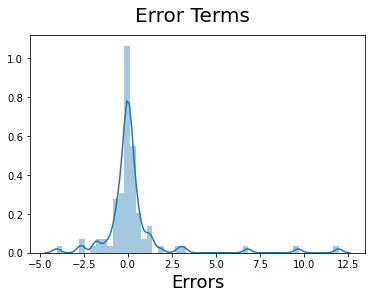

In [128]:
res = y_test - y_pred

fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

# error = y_estimate - y_actual
# normal curve 

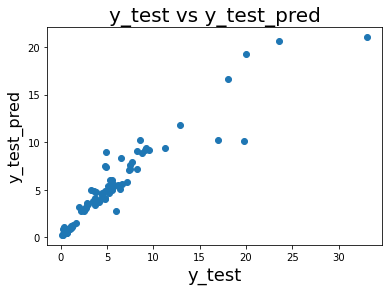

In [130]:
plt.scatter(y_test,y_pred)
plt.title("y_test vs y_test_pred", fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

In [136]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [140]:
print("MAS:   ", mean_absolute_error(y_test,y_pred))
print("Score: ", r2_score(y_test,y_pred))

MAS:    0.8853995604395601
Score:  0.8652948736926114


In [142]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  2.0071121409189328


In [143]:
import pickle

In [144]:
# open a file, where we wnat to store data
file = open('Car_Price_by_Rnadom_Forest.pkl','wb')
pickle.dump(rf, file)